In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def err_frac(a, b, e_a, e_b):
    """
    error de D = a/b -1 
    """
    return np.sqrt( (e_a/a)**2 + (e_b/b)**2 )*np.abs(a/b)

In [3]:
def err_frac2(a, b, e_a, e_b):
    """
    error de D = a/b -1 
    """
    return e_a/np.abs(b) + e_b/np.abs(a)

In [7]:
folder = '/home/franco/ICE/modified_gravity/results/'
f = {
    # 'lcdm_22':fits.open(folder+'Rv22-50/lcdm_z02-03_rvbig.fits'),
    'lcdm_22_nk100':fits.open(folder+'test_RAnew-lcat_LCDM_09_22.0-50.0_z2-3_typeall.fits'),
    # 'lcdm_22_30nk169':fits.open(folder+'test_jack169_LCDM_09_22.0-50.0_z2-3_typeall.fits'),
    'lcdm_22_nk169':fits.open(folder+'test_jack169-n22_LCDM_09_22.0-50.0_z2-3_typeall.fits'),
    # 'lcdm_15_nk169':fits.open(folder+'test_rv15-max_LCDM_09_15-50_z02-03_typeall.fits'),
    # 'fR_15_nk169':fits.open(folder+'test_rv15-max_fR_09_15-50_z02-03_typeall.fits'),
    'lcdm_22_nk225':fits.open(folder+'test_jack225_LCDM_09_22.0-50.0_z2-3_typeall.fits'),
    # 'fR_22_nk100':fits.open(folder+'test_RAnew-lcat_fR_09_22.0-50.0_z2-3_typeall.fits'),
    # 'lcdm_22_mismo0':fits.open(folder+'test_RAvoid_mismo0_LCDM_09_22.0-50.0_z2-3_typeall.fits.fits'),
    # 'lcdm_22_180':fits.open(folder+'test_RAvoid+180_LCDM_09_22.0-50.0_z2-3_typeall.fits.fits'),
    # 'lcdm_22_viejo':fits.open(folder+'test_RAvoid_original_LCDM_09_22.0-50.0_z2-3_typeall.fits.fits'),
    # 'lcdm_10-15':fits.open(folder+'Rv10-15/lcdm_z02-03_rv10-15.fits'),
    # 'sc_22':fits.open(folder+'Rv22-50/test_rv22_ravoid_sincorr.fits'),
    # 'fR':fits.open(folder+'fR_z02-03_rv15.fits'),
}

In [4]:
f['lcdm_15_nk169'][0].header['nk']

169

In [9]:
p={}
for key,value in f.items():
    nk = value[0].header['nk']
    ndots = value[0].header['ndots']
    try:
        p[key] = {
            'Rp':value[1].data.Rp.reshape(nk+1,ndots)[0],
            'S':value[1].data.Sigma.reshape(nk+1,ndots)[0],
            'DSt':value[1].data.DSigma_T.reshape(nk+1,ndots)[0],
            'DSx':value[1].data.DSigma_X.reshape(nk+1,ndots)[0],
            'covS':value[2].data.covS.reshape(ndots,ndots),
            'covDSt':value[2].data.covDSt.reshape(ndots,ndots),
            'covDSx':value[2].data.covDSx.reshape(ndots,ndots),
        }
    except:
        print(key)
        p[key] = {
            'Rp':value[1].data.Rp.reshape(nk+1,ndots)[0],
            'S':value[1].data.Sigma.reshape(nk+1,ndots)[0],
            'DSt':value[1].data.DSigma_T.reshape(nk+1,ndots)[0],
            'DSx':value[1].data.DSigma_X.reshape(nk+1,ndots)[0],
            'covS':value[2].data.Sigma.reshape(ndots,ndots),
            'covDSt':value[2].data.DSigma_T.reshape(ndots,ndots),
            'covDSx':value[2].data.DSigma_X.reshape(ndots,ndots),
        }

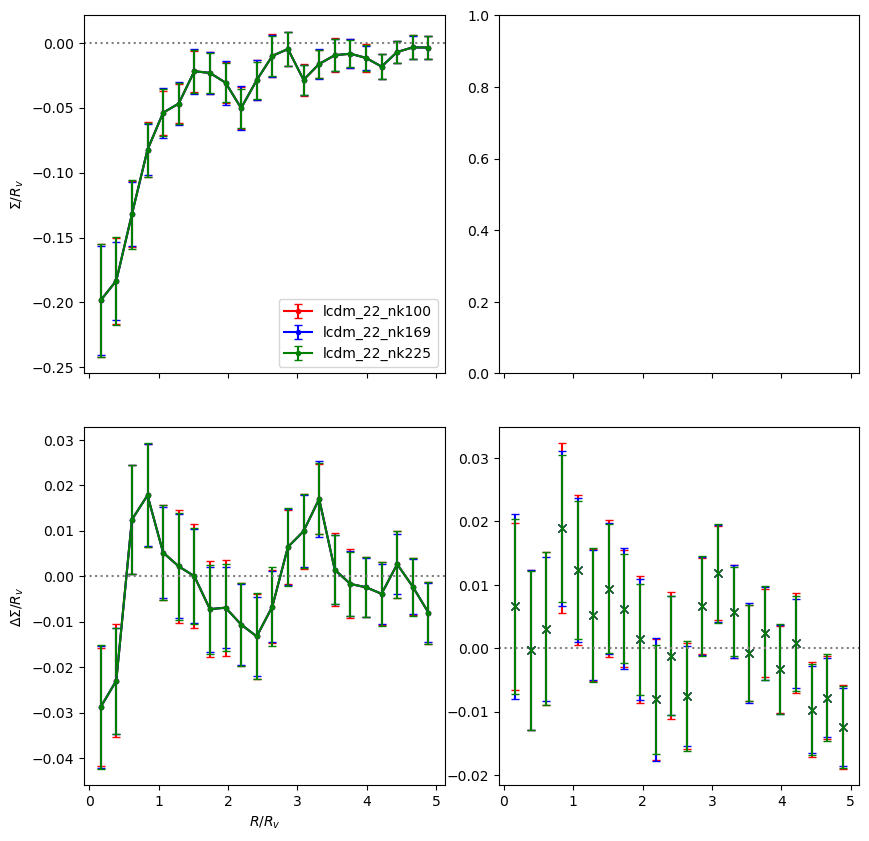

In [10]:
c = ['r','b','g','c']

fig, (ax1,ax2) = plt.subplots(2,2,
                             figsize=(10,10),
                             sharex=True)
ax1[0].axhline(0,ls=':',c='gray')
for i,(key,value) in enumerate(p.items()):
    ax1[0].errorbar(value['Rp'], value['S'], np.sqrt(np.diag(value['covS'])),
                 label=key, fmt='.-', c=c[i], capsize=3)
        
    ax2[0].errorbar(value['Rp'], value['DSt'], np.sqrt(np.diag(value['covDSt'])),
                 label=key, fmt='.-', c=c[i], capsize=3)

    ax2[1].errorbar(value['Rp'], value['DSx'], np.sqrt(np.diag(value['covDSx'])),
                 label=key, fmt='x', c=c[i], capsize=3)

ax2[0].axhline(0,ls=':',c='gray')
ax2[1].axhline(0,ls=':',c='gray')

ax2[0].set_xlabel('$R/R_v$')
ax1[0].set_ylabel('$\\Sigma / R_v$')
ax2[0].set_ylabel('$\\Delta \\Sigma / R_v$')
ax1[0].legend()

plt.subplots_adjust(wspace=0.15, hspace=0.15)

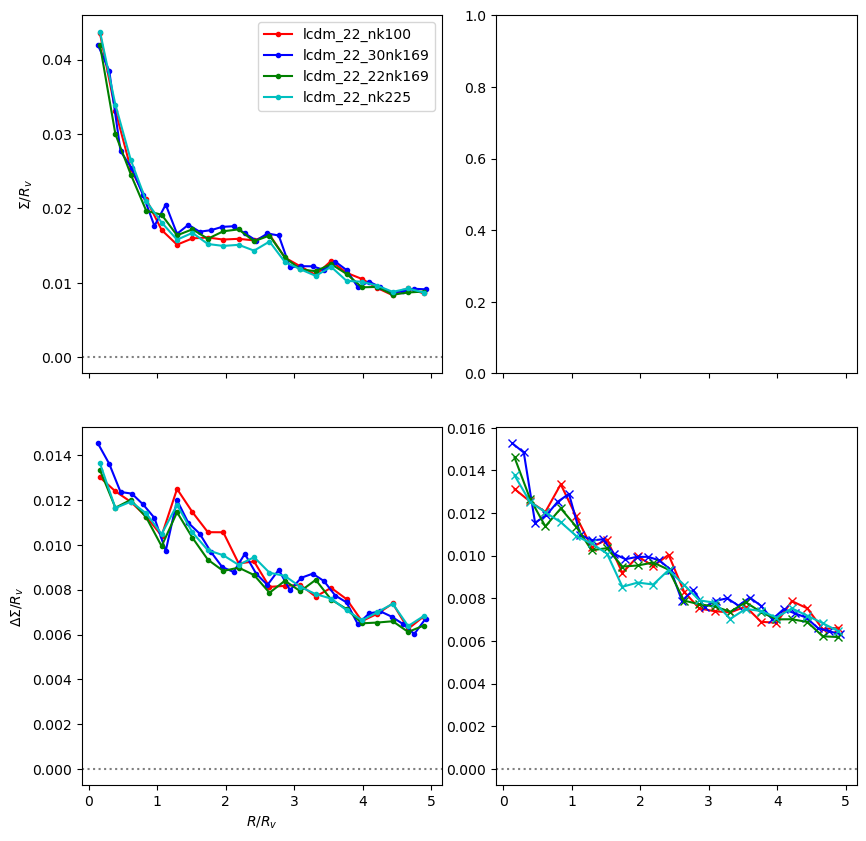

In [96]:
c = ['r','b','g','c']

fig, (ax1,ax2) = plt.subplots(2,2,
                             figsize=(10,10),
                             sharex=True)
ax1[0].axhline(0,ls=':',c='gray')
for i,(key,value) in enumerate(p.items()):
    ax1[0].plot(value['Rp'], np.sqrt(np.diag(value['covS'])),
                 '.-', label=key, c=c[i])
        
    ax2[0].plot(value['Rp'], np.sqrt(np.diag(value['covDSt'])),
                 '.-', label=key, c=c[i])

    ax2[1].plot(value['Rp'], np.sqrt(np.diag(value['covDSx'])),
                 'x', label=key, c=c[i])
    ax2[1].plot(value['Rp'], np.sqrt(np.diag(value['covDSx'])),
                 '-', label=key, c=c[i])

ax2[0].axhline(0,ls=':',c='gray')
ax2[1].axhline(0,ls=':',c='gray')

ax2[0].set_xlabel('$R/R_v$')
ax1[0].set_ylabel('$\\Sigma / R_v$')
ax2[0].set_ylabel('$\\Delta \\Sigma / R_v$')
ax1[0].legend()

plt.subplots_adjust(wspace=0.15, hspace=0.15)

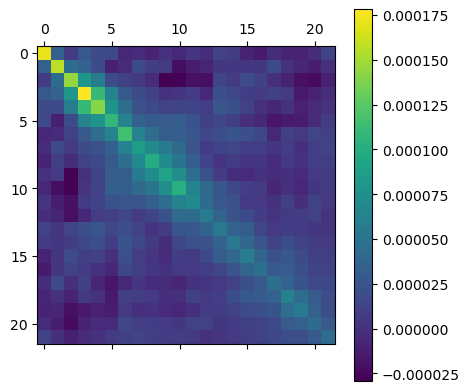

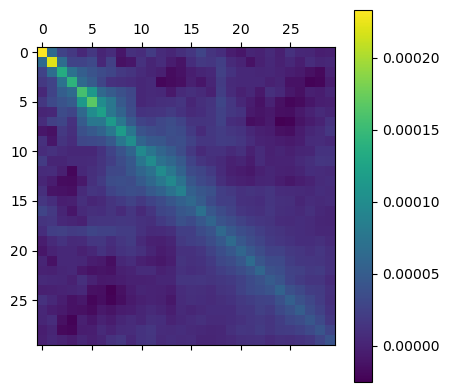

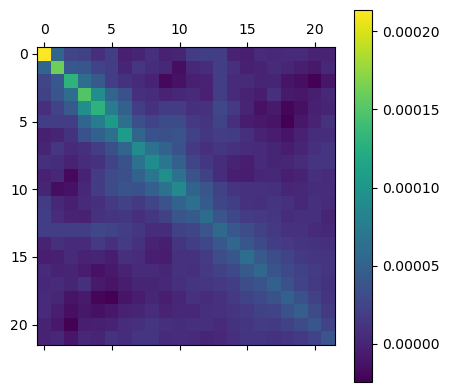

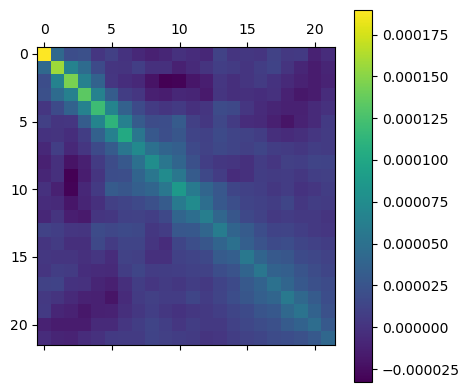

In [100]:
for key,value in p.items():
    plt.matshow(value['covDSx'])
    plt.colorbar()

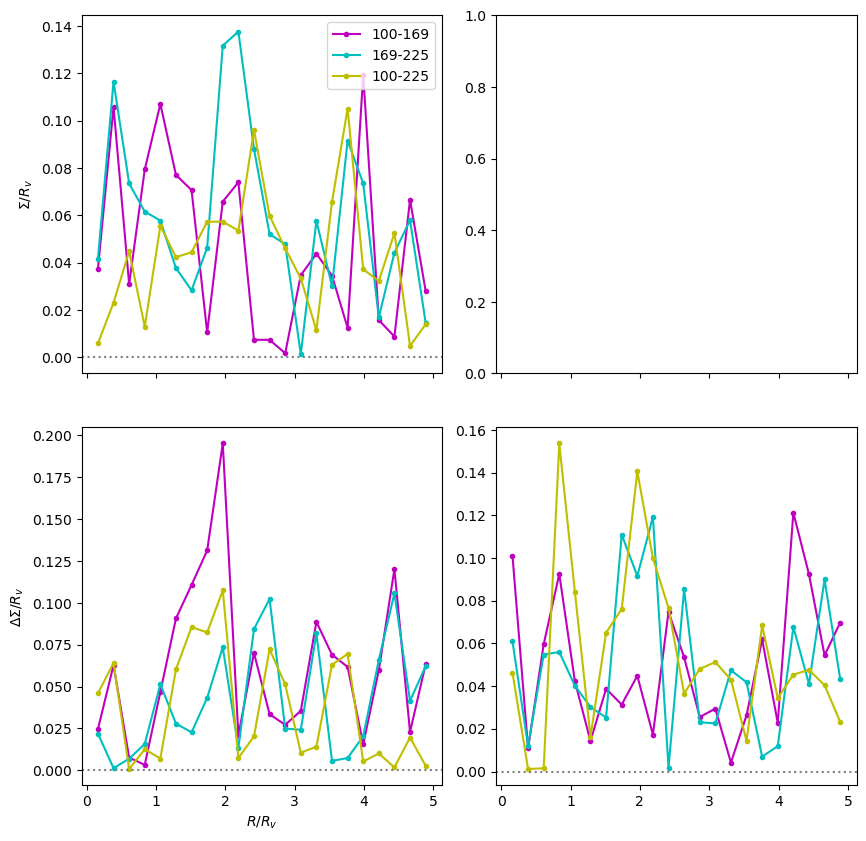

In [74]:
c = ['m', 'c', 'y']

fig, (ax1,ax2) = plt.subplots(2,2,
                             figsize=(10,10),
                             sharex=True)
ax1[0].axhline(0,ls=':',c='gray')

ax1[0].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk100']['covS'])) - np.sqrt(np.diag(p['lcdm_22_nk169']['covS'])))/np.sqrt(np.diag(p['lcdm_22_nk169']['covS'])),
    '.-', c=c[0], label='100-169',
)

ax1[0].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk169']['covS'])) - np.sqrt(np.diag(p['lcdm_22_nk225']['covS'])))/np.sqrt(np.diag(p['lcdm_22_nk225']['covS'])),
    '.-', c=c[1], label='169-225',
)

ax1[0].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk100']['covS'])) - np.sqrt(np.diag(p['lcdm_22_nk225']['covS'])))/np.sqrt(np.diag(p['lcdm_22_nk225']['covS'])),
    '.-', c=c[2], label='100-225',
)

ax2[0].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk100']['covDSt'])) - np.sqrt(np.diag(p['lcdm_22_nk169']['covDSt'])))/np.sqrt(np.diag(p['lcdm_22_nk169']['covDSt'])),
    '.-', c=c[0],label='100-169',
)

ax2[0].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk169']['covDSt'])) - np.sqrt(np.diag(p['lcdm_22_nk225']['covDSt'])))/np.sqrt(np.diag(p['lcdm_22_nk225']['covDSt'])),
    '.-', c=c[1],label='169-225',
)

ax2[0].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk100']['covDSt'])) - np.sqrt(np.diag(p['lcdm_22_nk225']['covDSt'])))/np.sqrt(np.diag(p['lcdm_22_nk225']['covDSt'])),
    '.-', c=c[2],label='100-225',
)

ax2[1].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk100']['covDSx'])) - np.sqrt(np.diag(p['lcdm_22_nk169']['covDSx'])))/np.sqrt(np.diag(p['lcdm_22_nk169']['covDSx'])),
    '.-', c=c[0],label='100-169',
)

ax2[1].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk169']['covDSx'])) - np.sqrt(np.diag(p['lcdm_22_nk225']['covDSx'])))/np.sqrt(np.diag(p['lcdm_22_nk225']['covDSx'])),
    '.-', c=c[1],label='169-225',
)

ax2[1].plot(
    p['lcdm_22_nk100']['Rp'], 
    np.abs(np.sqrt(np.diag(p['lcdm_22_nk100']['covDSx'])) - np.sqrt(np.diag(p['lcdm_22_nk225']['covDSx'])))/np.sqrt(np.diag(p['lcdm_22_nk225']['covDSx'])),
    '.-', c=c[2],label='100-225',
)

ax2[0].axhline(0,ls=':',c='gray')
ax2[1].axhline(0,ls=':',c='gray')

ax2[0].set_xlabel('$R/R_v$')
ax1[0].set_ylabel('$\\Sigma / R_v$')
ax2[0].set_ylabel('$\\Delta \\Sigma / R_v$')
ax1[0].legend()

plt.subplots_adjust(wspace=0.15, hspace=0.15)

In [88]:
np.ceil(10.5).astype(int)

11

## testing `funcs` vs `maria_func`

In [43]:
import sys
sys.path.append('/home/franco/FAMAF/Lensing/codes_tesis/')
import maria_func
sys.path.append('/home/franco/ICE/modified_gravity/lensing/')
import funcs

261.2180229058746 78.2597310440606


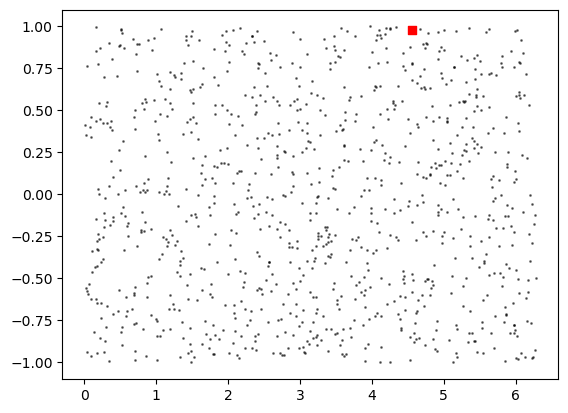

In [277]:
ra_gal = np.random.uniform(0.0,np.pi*2.0, 1000)
dec_gal = np.arcsin(np.random.uniform(-1.0,1.0, 1000))

RA0, DEC0 = np.random.rand()*2.0*np.pi, np.arcsin(np.random.uniform(-1.0,1.0,1)[0])
print(np.rad2deg(RA0), np.rad2deg(DEC0))

plt.scatter(ra_gal, np.sin(dec_gal), alpha=0.5, c='k', s=1)
plt.scatter(RA0, np.sin(DEC0), c='r', marker='s')
plt.show()

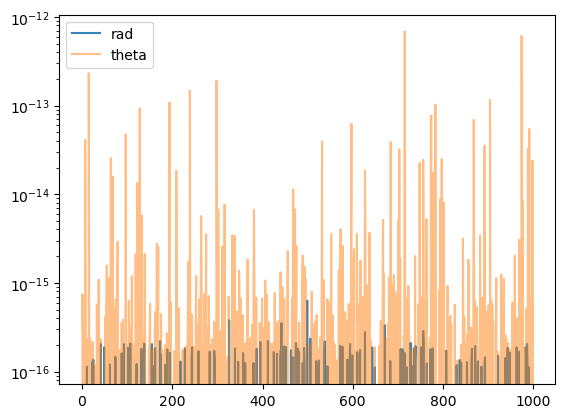

In [278]:
maria = maria_func.eq2p2(ra_gal, dec_gal, RA0, DEC0)

mio = funcs.eq2p2(ra_gal, dec_gal, RA0,DEC0)

plt.plot((maria[0] - mio[0])/np.abs(maria[0]), label='rad',alpha=0.9)
plt.plot((maria[1] - mio[1])/np.abs(maria[1]),label='theta',alpha=0.5)
plt.semilogy()
plt.legend()
plt.show()